# Лабораторная работа 1 
## Персептроны. Процедура обучения Розенблатта
Вариант 3 

Сутдент: Будникова Валерия Павловна 

группа: М8О-407Б-19  

### Цель работы: 
Исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

### Задание:
1. Для первой обучающей выборки построить и обучить сеть, которая будет правильно относить точки к двум классам. Отобразить дискриминантную линию и проверить качество обучения.
2. Изменить обучающее множество так, чтобы классы стали линейно неразделимыми. Проверить возможности обучения по правилу Розенблатта.
3. Для второй обучающей выборки построить и обучить сеть, которая будет правильно относить точки к четырем классам. Отобразить дискриминантную линию и проверить качество обучения.
Сценарий работы:

### Реализация:

In [199]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.10.0


## Часть1

### Вспомогательные функции:

In [200]:
def DrawPoints(p, l, line = []):
    for i in range(len(l)):
        if l[i] == 1:
            plt.plot(p[i][0], p[i][1], '.', color = 'r', markersize=10)
        else:
            plt.plot(p[i][0], p[i][1], '.', color = 'g', markersize=10)
    if line != []: plt.plot(line[0], line[1])
    plt.ylim(min(p)[0] - 2, max(p)[0] + 2)

### Заданные вариантом точки:


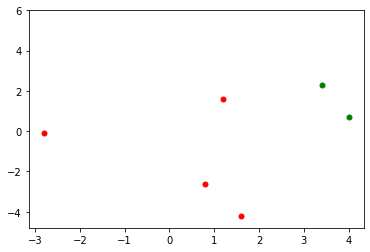

In [201]:
points = np.array([[-2.8, 4, 3.4, 0.8, 1.6, 1.2], [-0.1, 0.7, 2.3, -2.6, -4.2, 1.6]]).T.tolist()
labels = [1, 0, 0, 1, 1, 1]
DrawPoints(points, labels)

### Создание и обучение модели:

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


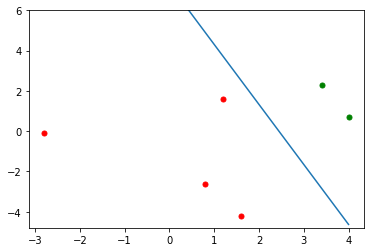

In [227]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=2, activation = keras.activations.sigmoid,
                            kernel_initializer=keras.initializers.RandomNormal(stddev=0.5,mean=0.0),
                            bias_initializer=keras.initializers.Zeros(), ))

model.compile(loss=keras.losses.mse, optimizer = keras.optimizers.Adam(0.015), metrics=['mae'])
model.summary()

ep = 100
history = model.fit(points, labels, batch_size=1, epochs=ep, verbose=0);

weights = model.layers[0].get_weights()
w1, w2 = weights[0][0][0], weights[0][1][0]
b = weights[1][0]

x = np.linspace(min(points)[0], max(points)[0], 10)
y = -x * w1 / w2 - b  / w2

DrawPoints(points, labels, [x, y])

### График поведения ошибки во время обучения:

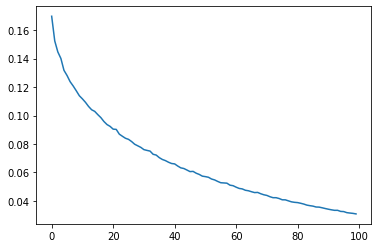

In [236]:
plt.plot(range(ep), history.history['loss']);

### График поведения метрики mae:

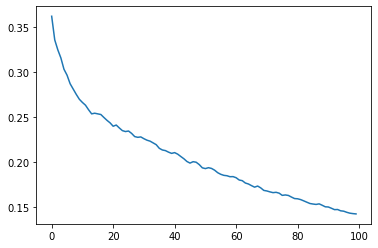

In [237]:
plt.plot(range(ep), history.history['mae']);

## Часть2

### Вспомогательные функции:

In [230]:
def DrawPoints2(p, l, line1 = [], line2 = []):
    for i in range(len(l)):
        if l[i] == [0, 0]:
            plt.plot(p[i][0], p[i][1], '.', color = 'r', markersize=10 )
        elif l[i] == [0, 1]:
            plt.plot(p[i][0], p[i][1], '.', color = 'g', markersize=10 )
        elif l[i] == [1, 0]:
            plt.plot(p[i][0], p[i][1], '.', color = 'c', markersize=10 )
        elif l[i] == [1, 1]:
            plt.plot(p[i][0], p[i][1], '.', color = 'y', markersize=10 )
    if line1 != []: plt.plot(line1[0], line1[1])
    if line2 != []: plt.plot(line2[0], line2[1])
    plt.ylim(min(p)[0] - 5, max(p)[0] + 5)

### Заданные вариантом точки:

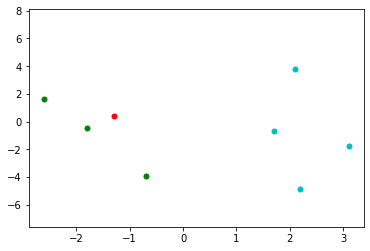

In [231]:
points2 = np.array([[-1.8, 2.1, 2.2, 1.7, -0.7, 3.1, -2.6, -1.3], [-0.5, 3.8, -4.9, -0.7, -3.9, -1.8, 1.6, 0.4]]).T.tolist()
labels2 = np.array([[0, 1, 1, 1, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 1, 0]]).T.tolist()


DrawPoints2(points2, labels2)

### Создание и обучение модели:

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


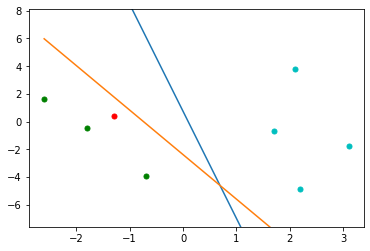

In [241]:

from tabnanny import verbose


model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(2, input_dim=2, activation=keras.activations.sigmoid,
                            kernel_initializer=keras.initializers.RandomNormal(stddev=0.5, mean=0.0),
                            bias_initializer=keras.initializers.Zeros(), ))

model2.compile(loss=keras.losses.mse, optimizer = keras.optimizers.Adam(0.007), metrics=['mae'])
model2.summary()

ep2 = 100
history2 = model2.fit(points2, labels2, batch_size=1, epochs=ep2, verbose=0);

weights = model2.layers[0].get_weights()
w01, w02 = weights[0][0][0], weights[0][1][0]
w11, w12 = weights[0][0][1], weights[0][1][1]
b1, b2 = weights[1][0], weights[1][1]

x1 = x2 = np.linspace(min(points2)[0], max(points2)[0], 4)
y1 = -x1 * w01 / w02 - b1  / w02
y2 = -x2 * w11 / w12 - b2  / w12


DrawPoints2(points2, labels2, [x1, y1], [x2, y2])

### График поведения ошибки во время обучения:

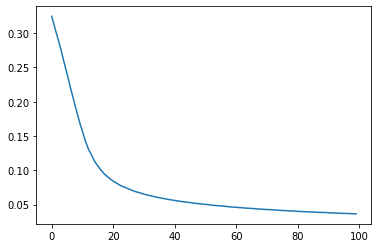

In [239]:
plt.plot(range(ep2), history2.history['loss']);

### График поведения метрики mae:

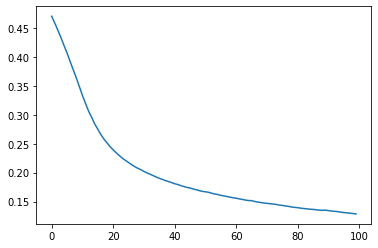

In [240]:
plt.plot(range(ep2), history2.history['mae']);

## Вывод

В ходе данной лабораторной работы я реализовала персептрона Розенблатта. Также изобразила графики поведения ошибок и метрик.
Во второй части лабораторной работы были даны несбалансированные данные, разделенные на три класса, что затруднило построение разделяющих линий.